In [6]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 윈저사이저 적용
df = pd.read_csv('../분류모델 + 성능평가/label지정.csv', encoding='CP949')
df.drop(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', 'month'],axis=1,inplace=True)
for col in df.columns:
     df[col] = winsorize(df[col], limits= 0.01)

In [8]:
# Data set1 로지로 선정된 피처들 분리
df = df.sort_values(["year"],ascending=True)
df_data = df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]순운전자본비율',
              '[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df_data_scaled= StandardScaler().fit_transform(df_data)
# df_data_scaled= MinMaxScaler().fit_transform(df_data)
# df_data_scaled = pd.DataFrame(df_data_scaled)
# df_data_scaled.columns =[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율',
# '[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
# df[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율',
# '[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']] = df_data_scaled[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
df =df.reset_index(drop="index")
df.head()

,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,[제조]매출액총이익률,[제조]매출액순이익률,...,[제조]설비투자효율,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,label
0,56.40,-5.90,-12.89,1.98,-2.02,17.64,-78.28,-1.43,41.83,-8.50,...,35.86,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,0
1,-1.41,-6.94,-5.45,-0.25,-1.44,4.52,-32.13,32.57,46.33,5.97,...,705.44,0.00,39.01,45.08,54.92,15.30,17.44,19.13,2011,0
2,-6.84,0.00,1.61,3.11,21.79,4.78,-4.38,4.46,21.81,6.67,...,45.60,90.22,26.34,34.64,65.36,25.33,1.72,2.39,2011,0
3,38.02,-0.28,-6.99,1.83,3.74,4.69,0.00,-76.06,22.83,1.20,...,481.09,0.00,20.74,85.32,14.68,5.77,22.67,4.26,2011,0
4,244.00,184.49,95.92,187.78,100.71,261.04,848.10,499.60,13.35,11.09,...,120.05,6317.93,20.51,43.84,56.16,54.05,8.56,2.93,2011,0


In [9]:
# train test set 분리
df1 = df[df['year']<2019] #train
df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율',
              '[제조]현금비율','[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
X_test = df2[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율',
              '[제조]부채비율','[제조]매출채권회전률','[제조]노동소득분배율','[제조]자기자본배율']]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)

In [10]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV


In [12]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [13]:

tree = DecisionTreeClassifier()

# 딕셔너리로 전달
# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'max_depth':[2,3,4,5,6,7,8], #7개
    'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
}
grid_search = GridSearchCV(tree
                          , param_grid = param_grid
                          , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                          , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(X_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 6}, 최적 평균 정확도 :0.984


In [14]:
# 최적 하이퍼 파라미터 적용 디시전 트리  
#{'max_depth': 3, 'min_samples_leaf': 6}, 최적 평균 정확도 :0.984
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 3,min_samples_leaf=6)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [15]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [16]:
 # 하이퍼파라미터 Grid-Search
 from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
 grid_search = {'criterion': ['entropy', 'gini'],
                'max_depth': [2,4,6,8],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [4,6,8.10],
                'min_samples_split': [4,6,8,10],
                'n_estimators': [20,40,60,80,100]}

 model = RandomForestClassifier()
 grid = GridSearchCV(estimator = model, param_grid = grid_search, 
                                cv = 4,verbose=0, n_jobs = -1)
 grid.fit(X_train,y_train)

# # 최선의 결과 출력
 print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}, 최적 평균 정확도 :0.985


c:\Users\82104\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [105]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 
# 'min_samples_split': 4, 'n_estimators': 20}, 최적 평균 정확도 :0.985
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'auto',
                                     max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=20)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [106]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2','l1','elasticnet','None'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [111]:
# # import kNN library
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score

# k_list = []


# cross_validation_scores = []
# X_train
# y_train 

# # 10-fold cross validation
# for k in range (1,50):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train.values.ravel(),
#                              cv=5, scoring='accuracy')
#     cross_validation_scores.append(scores.mean())

# best = pd.DataFrame(cross_validation_scores)
# best.max()

In [112]:
# # visualize accuracy according to k
# plt.plot(k_list, cross_validation_scores)
# plt.xlabel('the number of k')
# plt.ylabel('Accuracy')
# plt.show()

In [113]:
# # find best k
# cvs = cross_validation_scores
# k = k_list[cvs.index(max(cross_validation_scores))]
# print("The best number of k : " + str(k) )

In [114]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [115]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률',
                 '[제조]노동소득분배율','[제조]자기자본배율']]
X_train_XG.columns = [['유동자산구성비율','자기자본구성비율','총자본증가율','자기자본증가율','순운전자본비율','부채비율','매출채권회전률','노동소득분배율','자기자본배율']]
X_test_XG = df2[['[제조]유동자산구성비율','[제조]자기자본구성비율','[제조]총자본증가율','[제조]자기자본증가율','[제조]현금비율','[제조]부채비율','[제조]매출채권회전률',
                 '[제조]노동소득분배율','[제조]자기자본배율']]
X_test_XG.columns =[['유동자산구성비율','자기자본구성비율','총자본증가율','자기자본증가율','순운전자본비율','부채비율','매출채권회전률','노동소득분배율','자기자본배율']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




[10:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [116]:
# #xgb 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {
#           'n_estimators':[100,200,300,400,500],
#           'learning_rate':[0.03,0.04,0.05,0.06,0.07],
#           'max_depth' : [3,4,5.6,7,8,9]
#           }

# grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train_XG,y_train_XG)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [117]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}, 최적 평균 정확도:0.984
xgb_wrapper = XGBClassifier(learning_rate= 0.07, max_depth= 4, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

In [118]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [124]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,10):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(X_train, y_train)
    pc_pred = pc_clf.predict(X_test)
    
    pc_scores=accuracy_score(y_test, pc_pred)
    print(pc_scores)



0.9887027658745617
0.983638488507986
0.9894818854694195
0.9859758472925594
0.987534086482275
0.9887027658745617
0.9871445266848461
0.9887027658745617
0.9883132060771328


In [126]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 3)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



In [127]:
# # 1단계 : 가중치 초기화 
# w = np.zeros(1 + X_train.shape[1])
 
# # 최초 분류
# input_signal = np.dot(X_train, w[1:]) + w[0]
 
# def out_put(X):
#     return np.where(X >= 0.0, 1, 0)
 
# errors = []
# epoch = 100
# for time in range(0,epoch):
#     print("{0}번째 반복 입니다".format(time))
#     eta = 0.01
#     idx=0
#     for xi, target in zip(X_train, y_train):
#         updated_w = eta * (target - pc_pred[idx])
#         w[1:] += updated_w * xi
#         w[0] += updated_w
 
#         idx += 1
#     input_signal = np.dot(X_train, w[1:]) + w[0]
#     pc_pred = out_put(input_signal)
#     errors.append(((y_train - pc_pred).sum())/100)
#     print(((y_train - pc_pred).sum())/100)
#     if ((y_train - pc_pred).sum())/100 == 0:
#         break

### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [128]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2512   25]
 [  26    4]]
정확도: 0.9801, 정밀도 : 0.1379, 재현율:0.1333,F1 스코어:0.1356
ROC 스코어: 0.5617, PR score : 0.0285
None
디시전트리
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573
ROC 스코어: 0.6064, PR score : 0.0366
None
디시전트리 최적의 모델
오차행렬
[[2530    7]
 [  23    7]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.2333,F1 스코어:0.3182
ROC 스코어: 0.6153, PR score : 0.1256
None
랜덤포레스트
오차행렬
[[2527   10]
 [  25    5]]
정확도: 0.9864, 정밀도 : 0.3333, 재현율:0.1667,F1 스코어:0.2222
ROC 스코어: 0.5814, PR score : 0.0653
None
랜덤포레스트 최적의 모델
오차행렬
[[2529    8]
 [  25    5]]
정확도: 0.9871, 정밀도 : 0.3846, 재현율:0.1667,F1 스코어:0.2326
ROC 스코어: 0.5818, PR score : 0.0738
None
로지스틱
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606
ROC 스코어: 0.5163, PR score : 0.0224
None
로지스틱회귀 최적의 모델
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000
ROC 스코어: 0.5000, PR score : 0.0117
None
Knn
오차행렬
[[2528    9]
 [  28    2]]
정확도: 0.9856, 정밀도 : 0.1818, 재현율:0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.60,0.65,0.7,0.75]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2457   80]
 [  23    7]]
정확도: 0.9599, 정밀도 : 0.0805, 재현율:0.2333,F1 스코어:0.1197, roc 스코어: 0.6009
임곗값: 0.2
오차행렬
[[2492   45]
 [  25    5]]
정확도: 0.9727, 정밀도 : 0.1000, 재현율:0.1667,F1 스코어:0.1250, roc 스코어: 0.5745
임곗값: 0.3
오차행렬
[[2500   37]
 [  25    5]]
정확도: 0.9758, 정밀도 : 0.1190, 재현율:0.1667,F1 스코어:0.1389, roc 스코어: 0.5760
임곗값: 0.4
오차행렬
[[2510   27]
 [  26    4]]
정확도: 0.9794, 정밀도 : 0.1290, 재현율:0.1333,F1 스코어:0.1311, roc 스코어: 0.5613
임곗값: 0.45
오차행렬
[[2510   27]
 [  26    4]]
정확도: 0.9794, 정밀도 : 0.1290, 재현율:0.1333,F1 스코어:0.1311, roc 스코어: 0.5613
임곗값: 0.5
오차행렬
[[2512   25]
 [  26    4]]
정확도: 0.9801, 정밀도 : 0.1379, 재현율:0.1333,F1 스코어:0.1356, roc 스코어: 0.5617
임곗값: 0.55
오차행렬
[[2515   22]
 [  26    4]]
정확도: 0.9813, 정밀도 : 0.1538, 재현율:0.1333,F1 스코어:0.1429, roc 스코어: 0.5623
임곗값: 0.6
오차행렬
[[2515   22]
 [  26    4]]
정확도: 0.9813, 정밀도 : 0.1538, 재현율:0.1333,F1 스코어:0.1429, roc 스코어: 0.5623
임곗값: 0.65
오차행렬
[[2518   19]
 [  26    4]]
정확도: 0.9825, 정밀도 : 0.1739, 재현율:0.1333,F1 스코어:0.1509, roc 스코어: 0.5629
임곗값: 0.

In [ ]:
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.2
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.3
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.4
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.45
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.5
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.55
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.6
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.65
오차행렬
[[2485   52]
 [  23    7]]
정확도: 0.9708, 정밀도 : 0.1186, 재현율:0.2333,F1 스코어:0.1573, roc 스코어: 0.6064
임곗값: 0.

In [ ]:
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2488   49]
 [  18   12]]
정확도: 0.9739, 정밀도 : 0.1967, 재현율:0.4000,F1 스코어:0.2637, roc 스코어: 0.6903
임곗값: 0.2
오차행렬
[[2524   13]
 [  24    6]]
정확도: 0.9856, 정밀도 : 0.3158, 재현율:0.2000,F1 스코어:0.2449, roc 스코어: 0.5974
임곗값: 0.3
오차행렬
[[2531    6]
 [  26    4]]
정확도: 0.9875, 정밀도 : 0.4000, 재현율:0.1333,F1 스코어:0.2000, roc 스코어: 0.5655
임곗값: 0.4
오차행렬
[[2532    5]
 [  26    4]]
정확도: 0.9879, 정밀도 : 0.4444, 재현율:0.1333,F1 스코어:0.2051, roc 스코어: 0.5657
임곗값: 0.45
오차행렬
[[2534    3]
 [  28    2]]
정확도: 0.9879, 정밀도 : 0.4000, 재현율:0.0667,F1 스코어:0.1143, roc 스코어: 0.5327
임곗값: 0.5
오차행렬
[[2535    2]
 [  29    1]]
정확도: 0.9879, 정밀도 : 0.3333, 재현율:0.0333,F1 스코어:0.0606, roc 스코어: 0.5163
임곗값: 0.55
오차행렬
[[2536    1]
 [  30    0]]
정확도: 0.9879, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.4998
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.65
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local

In [ ]:
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2442   95]
 [  14   16]]
정확도: 0.9575, 정밀도 : 0.1441, 재현율:0.5333,F1 스코어:0.2270, roc 스코어: 0.7479
임곗값: 0.2
오차행렬
[[2495   42]
 [  21    9]]
정확도: 0.9755, 정밀도 : 0.1765, 재현율:0.3000,F1 스코어:0.2222, roc 스코어: 0.6417
임곗값: 0.3
오차행렬
[[2514   23]
 [  23    7]]
정확도: 0.9821, 정밀도 : 0.2333, 재현율:0.2333,F1 스코어:0.2333, roc 스코어: 0.6121
임곗값: 0.4
오차행렬
[[2525   12]
 [  24    6]]
정확도: 0.9860, 정밀도 : 0.3333, 재현율:0.2000,F1 스코어:0.2500, roc 스코어: 0.5976
임곗값: 0.45
오차행렬
[[2526   11]
 [  24    6]]
정확도: 0.9864, 정밀도 : 0.3529, 재현율:0.2000,F1 스코어:0.2553, roc 스코어: 0.5978
임곗값: 0.5
오차행렬
[[2527   10]
 [  25    5]]
정확도: 0.9864, 정밀도 : 0.3333, 재현율:0.1667,F1 스코어:0.2222, roc 스코어: 0.5814
임곗값: 0.55
오차행렬
[[2530    7]
 [  25    5]]
정확도: 0.9875, 정밀도 : 0.4167, 재현율:0.1667,F1 스코어:0.2381, roc 스코어: 0.5820
임곗값: 0.6
오차행렬
[[2531    6]
 [  25    5]]
정확도: 0.9879, 정밀도 : 0.4545, 재현율:0.1667,F1 스코어:0.2439, roc 스코어: 0.5822
임곗값: 0.65
오차행렬
[[2531    6]
 [  27    3]]
정확도: 0.9871, 정밀도 : 0.3333, 재현율:0.1000,F1 스코어:0.1538, roc 스코어: 0.5488
임곗값: 0.

In [ ]:
get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2491   46]
 [  24    6]]
정확도: 0.9727, 정밀도 : 0.1154, 재현율:0.2000,F1 스코어:0.1463, roc 스코어: 0.5909
임곗값: 0.2
오차행렬
[[2525   12]
 [  27    3]]
정확도: 0.9848, 정밀도 : 0.2000, 재현율:0.1000,F1 스코어:0.1333, roc 스코어: 0.5476
임곗값: 0.3
오차행렬
[[2525   12]
 [  27    3]]
정확도: 0.9848, 정밀도 : 0.2000, 재현율:0.1000,F1 스코어:0.1333, roc 스코어: 0.5476
임곗값: 0.4
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.45
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.5
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.55


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tlsdm\AppData\Local

오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.6
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.65
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.7
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000
임곗값: 0.75
오차행렬
[[2537    0]
 [  30    0]]
정확도: 0.9883, 정밀도 : 0.0000, 재현율:0.0000,F1 스코어:0.0000, roc 스코어: 0.5000


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2512   25]
 [  19   11]]
정확도: 0.9829, 정밀도 : 0.3056, 재현율:0.3667,F1 스코어:0.3333, roc 스코어: 0.6784
임곗값: 0.2
오차행렬
[[2517   20]
 [  22    8]]
정확도: 0.9836, 정밀도 : 0.2857, 재현율:0.2667,F1 스코어:0.2759, roc 스코어: 0.6294
임곗값: 0.3
오차행렬
[[2521   16]
 [  22    8]]
정확도: 0.9852, 정밀도 : 0.3333, 재현율:0.2667,F1 스코어:0.2963, roc 스코어: 0.6302
임곗값: 0.4
오차행렬
[[2524   13]
 [  24    6]]
정확도: 0.9856, 정밀도 : 0.3158, 재현율:0.2000,F1 스코어:0.2449, roc 스코어: 0.5974
임곗값: 0.45
오차행렬
[[2525   12]
 [  24    6]]
정확도: 0.9860, 정밀도 : 0.3333, 재현율:0.2000,F1 스코어:0.2500, roc 스코어: 0.5976
임곗값: 0.5
오차행렬
[[2528    9]
 [  25    5]]
정확도: 0.9868, 정밀도 : 0.3571, 재현율:0.1667,F1 스코어:0.2273, roc 스코어: 0.5816
임곗값: 0.55
오차행렬
[[2529    8]
 [  25    5]]
정확도: 0.9871, 정밀도 : 0.3846, 재현율:0.1667,F1 스코어:0.2326, roc 스코어: 0.5818
임곗값: 0.6
오차행렬
[[2531    6]
 [  25    5]]
정확도: 0.9879, 정밀도 : 0.4545, 재현율:0.1667,F1 스코어:0.2439, roc 스코어: 0.5822
임곗값: 0.65
오차행렬
[[2532    5]
 [  25    5]]
정확도: 0.9883, 정밀도 : 0.5000, 재현율:0.1667,F1 스코어:0.2500, roc 스코어: 0.5823
임곗값: 0.

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


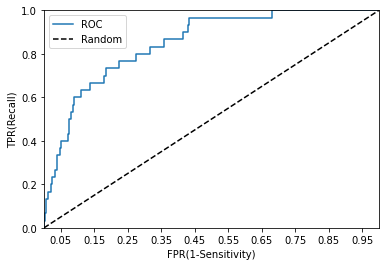

lda의 ROC AUC값: 0.8498


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


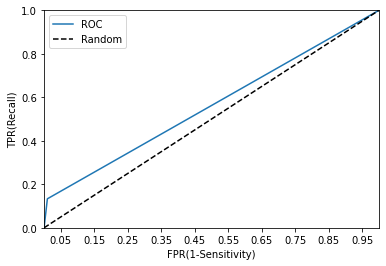

lda의 ROC AUC값: 0.5617


In [ ]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


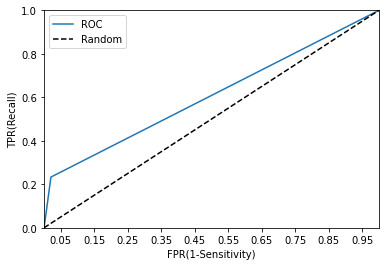

dt ROC AUC값: 0.6064


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


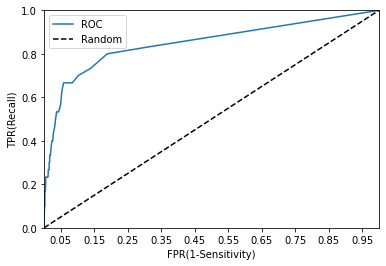

rf ROC AUC값: 0.8493


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


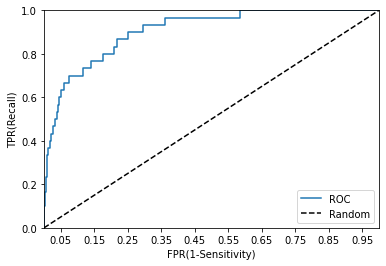

lr ROC AUC값: 0.9064


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

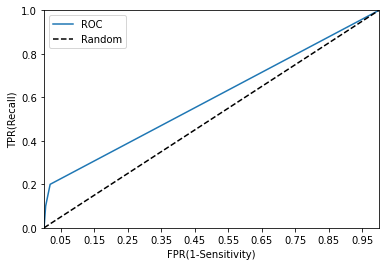

knn ROC AUC값: 0.5914


In [ ]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))